#                                    Statistical Learning Project

**Data Description**: The data at hand contains medical costs of people characterized by certain attributes.

**Domain**: Healthcare

**Context**: Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

**Attribute Information**
* **`age`**: age of primary beneficiary
* **`sex`**: insurance contractor gender, female, male
* **`bmi`**: Body mass index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9
* **`children`**: Number of children covered by health insurance / Number of dependents
* **`smoker`**: Smoking
* **`region`**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
* **`charges`**: Individual medical costs billed by health insurance.

**Learning Outcomes**
* Exploratory Data Analysis
* Practicing statistics using Python
* Hypothesis testing

## 1) Importing the Necessary libraries



In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
import seaborn as sns # Why sns?  It's a reference to The West Wing
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs
from scipy import stats # tells python that we are performing statistics
from statsmodels.stats.proportion import proportions_ztest #used to perform z-proportion test
from scipy.stats import chi2 #used for chi-square test
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
import sweetviz as sv #pip install sweetviz
from pandas_profiling import ProfileReport #pip install pandas-profiling
import autoviz as av #pip install autoviz

  Using cached autoviz-0.0.68-py3-none-any.whl (31 kB)


Note: you may need to restart the kernel to use updated packages.


## 2) Read the data as a data frame

In [2]:
df=pd.read_csv('insurance (2).csv')# Import the dataset named 'Insurance (2).csv' and storing as dataframe df using pandas
print(df.head()) # view the first 5 rows of the data
print()  #creating  empty space for better view
print()
print(df.tail(6)) # view the last 6 rows of the data

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


      age     sex    bmi  children smoker     region     charges
1332   52  female  44.70         3     no  southwest  11411.6850
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [3]:

my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## 3)Perform basic EDA  
### a) Shape of the data 

In [3]:
df.shape # to see the shape of the data

(1338, 7)

* **`Conclusion`**:There are 1338 Observations / Rows and 7 Attributes / Columns.

## b) Data type of each attribute 

In [4]:
print(df.dtypes) # if you want only datatype,we can use dtypes function

print()
print() # The below function also gives the missing values information

print(df.info())# To see the data type of each of the variable, number of values entered in each of the variables


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


* 
**`Conclusion`**: df.info() also gives the non-null count i.e it tells us whether there are any missing values in data in any row or not, here we can observe that all the attributes are non-null i.e there are no missing values in the data. There are several approaches to prove the same 

## c) Checking the presence of missing values 

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [6]:
missing_values_table(df)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


* **`Conclusion`**:Since the dataset has no missing values in the data, the missing value table is empty

## d)  5 point summary of numerical attributes 
The five number summary helps describe the center, spread and shape of data. The five summary statistics are as follows,

&nbsp;

* Minimum
* Q1 =25th percentile(25%)
* Q2 =50th percentile(50%)
* Q3 =75th percentile(75%)
* Maximum

In [7]:
df.describe() # the output results provide the five number summary of the numerical attributes.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.


Distributions with kde=true

<AxesSubplot:xlabel='charges'>

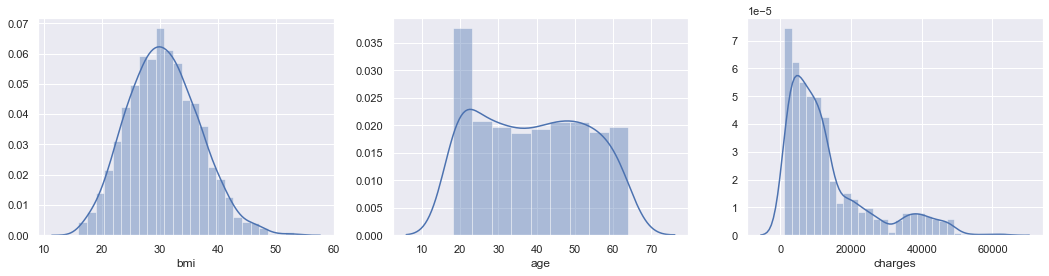

In [8]:
 # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(3, 1, 1)
sns.distplot(df["bmi"])   #distribution plot of bmi

ax = fig.add_subplot(3, 1, 2)
x = df[df["sex"] == "male"]
sns.distplot(x["age"])   #distribution plot of age

ax = fig.add_subplot(3, 1, 3)
sns.distplot(df["charges"])  #distribution plot of charges


* **`Conclusion`**:The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

<AxesSubplot:xlabel='charges'>

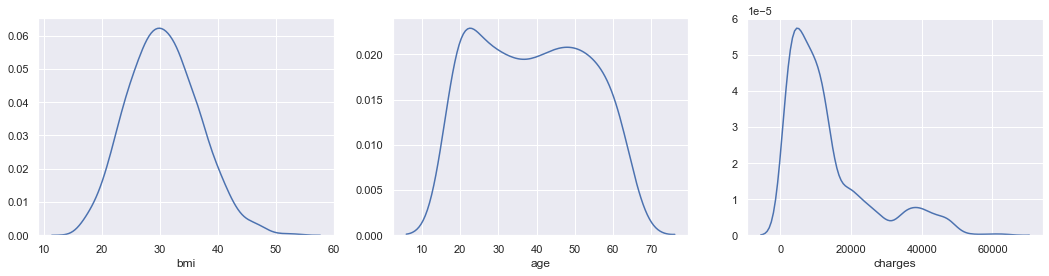

In [9]:
#we can also only plot kde
fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(1, 3, 1)
sns.distplot(df["bmi"],hist=False)   # adding an argument to plot only frequency polygon of bmi

ax = fig.add_subplot(1, 3, 2)
x = df[df["sex"] == "male"]
sns.distplot(x["age"],hist=False)   # adding an argument to plot only frequency polygon of age

ax = fig.add_subplot(1, 3, 3)
sns.distplot(df["charges"],hist=False)  # adding an argument to plot only frequency polygon of charges


<AxesSubplot:xlabel='charges'>

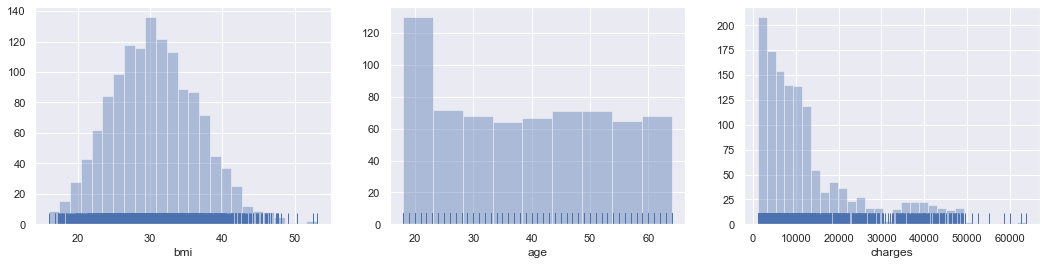

In [10]:
# we can turn the kde off and put a tic mark along the x-axis for every data point with rug

fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(1, 3, 1)
sns.distplot(df["bmi"],kde=False,rug=True)   # turn off kde for  bmi

ax = fig.add_subplot(1, 3, 2)
x = df[df["sex"] == "male"]
sns.distplot(x["age"],kde=False,rug=True)   # turn off kde for age

ax = fig.add_subplot(1, 3, 3)
sns.distplot(df["charges"],kde=False,rug=True)  # turn off kde for charges


#### This distribution can also be visualised in another manner. For this we can use the violin plot function from seaborn.The violin plot shows a vertical mirror image of the distribution along with the original distribution.

<AxesSubplot:xlabel='charges'>

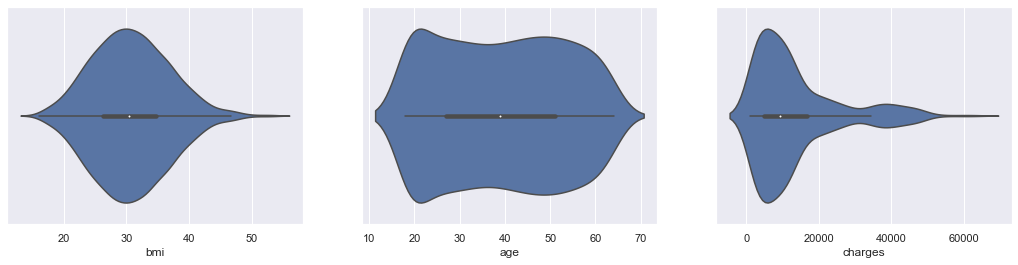

In [11]:
# violin plots for age,bmi and charges
fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(1, 3, 1)
sns.violinplot(df['bmi']) # plots a violin plt using the seaborn package.

ax = fig.add_subplot(1, 3, 2)
sns.violinplot(df['age']) # plots a violin plt using the seaborn package.

ax = fig.add_subplot(1, 3, 3)
sns.violinplot(df['charges']) # plots a violin plt using the seaborn package.


### We can also perform the cumulative distributions for the same

The cumulative distribution function (FX) gives the probability that the random variable X is less than or equal to a certain amount x. Its formula is: Summing the values for all outcomes less than or equal to x will give the solution.

<AxesSubplot:xlabel='charges'>

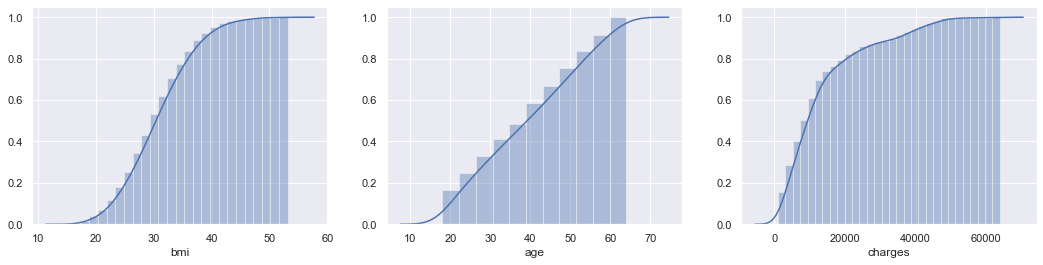

In [12]:
# cumulative distributions for age,bmi and charges
fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(1, 3, 1)
sns.distplot(df['bmi'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))#cumulative distribution plot

ax = fig.add_subplot(1, 3, 2)
sns.distplot(df['age'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))#cumulative distribution plot

ax = fig.add_subplot(1, 3, 3)
sns.distplot(df['charges'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))#cumulative distribution plot



## f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.




In [13]:
print("Skewness for 'Age :", df['age'].skew().round(3)) #finding skewness value and rounding it off to 3 digits for better approximation
print("Skewness for 'BMI :", df['bmi'].skew().round(3))#finding skewness value and rounding it off to 3 digits
print("Skewness for 'Charges :", df['charges'].skew().round(3))#finding skewness value and rounding it off to 3 digits

Skewness for 'Age : 0.056
Skewness for 'BMI : 0.284
Skewness for 'Charges : 1.516


## g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

#### we can use multiple techniques to deal with outliers.one such approach is using boxplot

<AxesSubplot:xlabel='charges'>

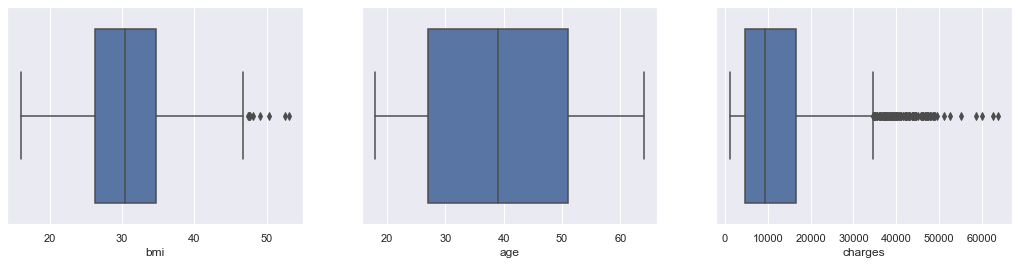

In [14]:

fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(1, 3, 1)
sns.boxplot(df['bmi']) # plots a boxplot for bmi using the seaborn package.

ax = fig.add_subplot(1, 3, 2)
sns.boxplot(df['age']) # plots a vboxplot for age using the seaborn package.

ax = fig.add_subplot(1, 3, 3)
sns.boxplot(df['charges']) # plots a boxplot for charges using the seaborn package.


* **`Conclusion`**:Here we can observe from the boxplot that there are multiple outliers for bmi and charges columns .

## Discover outliers with statistical rules

### using z-score

In [15]:

z = np.abs(stats.zscore(df['bmi']))
threshold = 3   #assigning a threshold value and checking for outliers
print(np.where(z > threshold))
print(z[116]) #checking whether the value is really a outlier or not



(array([ 116,  847, 1047, 1317]),)
3.0178611981425605


**Note:** The first array contains the list of row numbers and second array respective column numbers, which mean z[116][] have a Z-score higher than 3.

In [16]:
z = np.abs(stats.zscore(df['age']))  #calculating z score for age
threshold = 3   #assigning a threshold value and checking for outliers
np.where(z > threshold)


(array([], dtype=int64),)

* **`Conclusion`**:Here we can observe that,same as the boxplot,even using z-score we can observe that there are no outliers after 3 standard deviations

In [17]:
z = np.abs(stats.zscore(df['charges']))  #calculating z score for charges
threshold = 3   #assigning a threshold value and checking for outliers
np.where(z > threshold)


(array([  34,  543,  577,  819, 1146, 1230, 1300]),)

### Using IQR

In [18]:
Q1 = df['bmi'].quantile(0.25) #calculating 25th percentile
Q3 = df['bmi'].quantile(0.75) #calculating 75th percentile
IQR = Q3 - Q1 #calculating IQR
np.where((df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR)))# checking where our bmi values exceeds IQR limits

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317]),)

In [19]:
Q1 = df['age'].quantile(0.25) #calculating 25th percentile
Q3 = df['age'].quantile(0.75) #calculating 75th percentile
IQR = Q3 - Q1 #calculating IQR
np.where((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))# checking where our age values exceeds IQR limits

(array([], dtype=int64),)

In [20]:
Q1 = df['charges'].quantile(0.25) #calculating 25th percentile
Q3 = df['charges'].quantile(0.75) #calculating 75th percentile
IQR = Q3 - Q1 #calculating IQR
np.where((df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR)))# checking where our charges values exceeds IQR limits

(array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
          82,   84,   86,   94,  109,  123,  146,  158,  161,  175,  185,
         203,  223,  240,  242,  251,  252,  254,  256,  263,  265,  271,
         281,  288,  292,  298,  312,  314,  322,  327,  328,  330,  338,
         373,  377,  381,  420,  421,  422,  441,  476,  488,  500,  524,
         530,  543,  549,  558,  569,  577,  587,  609,  615,  621,  623,
         629,  665,  667,  668,  674,  677,  682,  689,  697,  706,  725,
         736,  738,  739,  742,  759,  803,  819,  826,  828,  842,  845,
         850,  852,  856,  860,  883,  893,  901,  917,  947,  951,  953,
         956,  958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062,
        1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146,
        1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284,
        1288, 1291, 1300, 1301, 1303, 1313, 1323]),)

## h. Distribution of categorical columns

### One naive approach  for potting categorical data is to use value counts and plot a bar chart

Text(0.5, 1.0, 'Distribution of region')

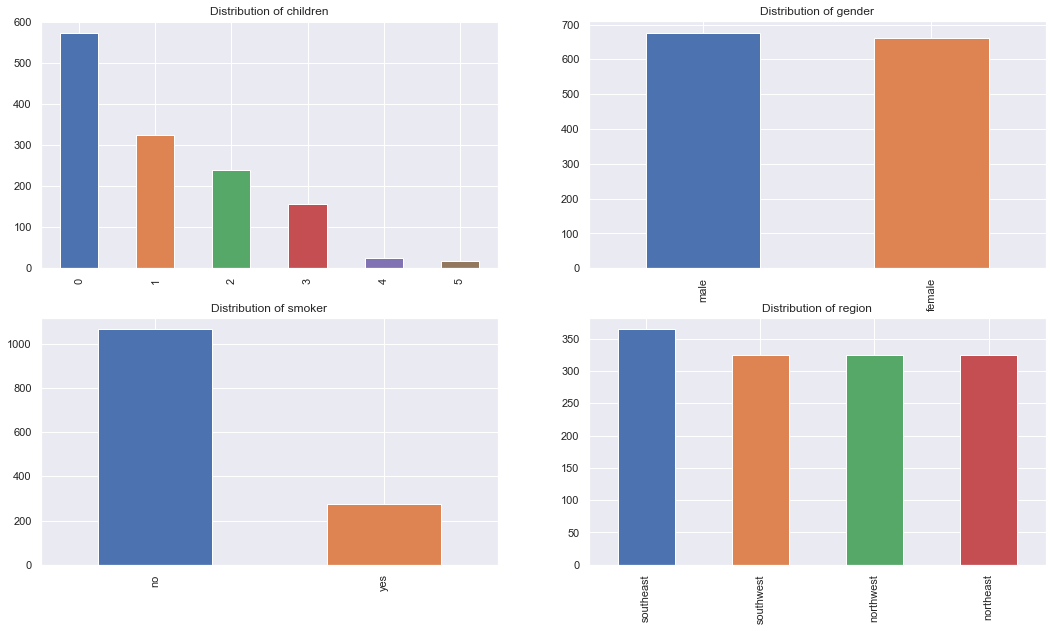

In [21]:
fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(2, 2, 1)  #arranging subplot
df['children'].value_counts().plot.bar(color = sns.color_palette('deep', 6)) #plotting barplot based on valuecounts
ax.set_title('Distribution of children') #setting title


ax = fig.add_subplot(2, 2, 2)
df['sex'].value_counts().plot.bar(color = sns.color_palette('deep', 2)) #plotting barplot based on valuecounts
ax.set_title('Distribution of gender')#setting title

ax = fig.add_subplot(2, 2, 3)
df['smoker'].value_counts().plot.bar(color = sns.color_palette('deep', 2)) #plotting barplot based on valuecounts
ax.set_title('Distribution of smoker')#setting title

ax = fig.add_subplot(2, 2, 4)
df['region'].value_counts().plot.bar(color = sns.color_palette('deep', 4)) #plotting barplot based on valuecounts
ax.set_title('Distribution of region')#setting title



A **strip plot** can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

Input data can be passed in a variety of formats, including:

Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

A “wide-form” DataFrame, such that each numeric column will be plotted.

An array or list of vectors.




Text(0.5, 1.0, 'Distribution of smoker vs number of children')

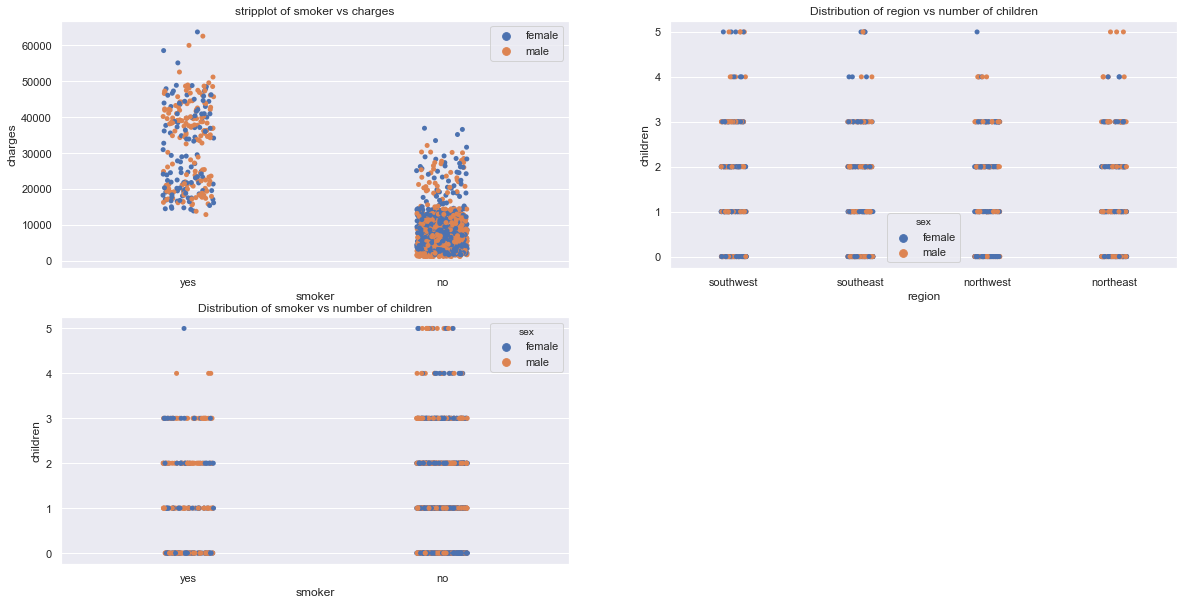

In [22]:

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(2, 2, 1)
sns.stripplot(x=df.smoker, y=df.charges, hue=df.sex) #plotting stripplot for smoker and charges
ax.set_title('stripplot of smoker vs charges')
ax.legend()

ax = fig.add_subplot(2, 2, 2)
sns.stripplot(x=df.region, y=df.children, hue=df.sex) #stripplot for region and number of children
ax.set_title('Distribution of region vs number of children')



ax = fig.add_subplot(2, 2, 3)
sns.stripplot(x=df.smoker, y=df.children, hue=df.sex) #stripplot for smoker and children
ax.set_title('Distribution of smoker vs number of children')


 **Swarmplot :** This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values.Below are the distributions using swarmplot

In [ ]:

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(2, 2, 1)
sns.swarmplot(x=df.smoker, y=df.charges, hue=df.sex) #performing smarmplot for better visualization
ax.set_title('stripplot of smoker vs charges')
ax.legend()

ax = fig.add_subplot(2, 2, 2)
sns.swarmplot(x=df.region, y=df.children, hue=df.sex) #performing smarmplot for better visualization
ax.set_title('Distribution of region vs number of children')



ax = fig.add_subplot(2, 2, 3)
sns.swarmplot(x=df.smoker, y=df.children, hue=df.sex) #performing smarmplot for better visualization
ax.set_title('Distribution of smoker vs number of children')


A **box plot** (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In [ ]:
#distributions using boxplots

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(wspace=0.2)

ax = fig.add_subplot(2, 2, 1)
ax = sns.boxplot(x = df.smoker, y = df.charges, hue = df.sex, palette = 'Dark2') #performing boxplot for distribution of categorical varialbles
ax.set_title('distribution of smoker vs charges')
ax.legend()

#similarly we can plot for other categorical variables

## i)Pair plot that includes all the columns of the data frame 

#### By default, this function will create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

In [ ]:
sns.pairplot(df,diag_kind = 'kde',palette="Dark2",kind="reg",hue='smoker')#we can use pair plots for numerical data

**we can perform stripplots and swarmplots for categorical pair plots, we have many examples before**

In [ ]:
sns.stripplot(df['smoker'], df['charges'], jitter=True); #we can use stripplot or swarmplot for categorical data

**we can also use PairGrid to perform the same**

In [ ]:
g = sns.PairGrid(df)# pairgrid for dataset
g = g.map(plt.scatter)

# 4. Answer the following questions with statistical evidence

### a) Do charges of people who smoke differ significantly from the people who don't?


***Step 1: Define null and alternative hypotheses:***

$H_0:$ there is no significant difference between the smoker and non-smoker class for the charges column

$H_1:$ there is a significant difference between the smoker and the non-smoker class for the charges column

***Step 2: Define Significance Level:***

Choose the $\alpha$, the level of significance according to the relative importance of the risks of committing Type I and 
Type II errors in the problem. 

Here, we select $\alpha$ = 0.05 

***Step 3:  Identify and Calculate the test statistic:***

**T-test**: A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

***Test statistic T =*** $\frac{\overline{X_1} - \overline{X_2}}{\sqrt{\frac{{s_1}^2} {n1}+ \frac{{s_2}^2}{n2}}}$

* where n1 and n2 are the sample sizes and X1 and X2 are the sample means 
* ${S_1}^2$ and ${S_2}^2$ are sample variances

***Step 4: Calculate the critical value:***
Calculate p-value from test-statistic

***Step 5:  Decide to reject or accept null hypothesis:***
Compare the p-value with significance level and decide hypothesis



In [ ]:
smokers = np.array(df[df['smoker'] == 'yes']['charges'])
non_smokers = np.array(df[df['smoker'] == 'no']['charges'])

print('Mean of Charges for Smokers is ',smokers.mean().round(2))
print('Mean of Charges for Non-Smokers is ',non_smokers.mean().round(2))

#performing an independent T-test
t, p_value = stats.ttest_ind(smokers, non_smokers)
print('P Value %1.3f' % p_value) 
if p_value <0.05:
    
    print('Since p value < 0.05 the difference is significant.Therefore We reject the null hypotheisis')
    print('And therefore Charges differs significantly.')

else:
    
    print('Since p-value >0.05 the difference is not significant and so we fail to reject the null hypotheisis')
    print("And therefore Charges don't differ significantly.")

* **`Conclusion`**: Reject $H_0$ (reject the null hypothesis) and conclude that ***charges differ significantly***

In [ ]:
#We can also visualize the above result by using distplot
sns.distplot(df[df["smoker"]== "yes"]["charges"], label="smoker");
sns.distplot(df[df["smoker"]== "no"]["charges"], label="smoker");
plt.legend()


### b) Does bmi of males differ significantly from that of females?

***Step 1: Define null and alternative hypotheses:***

$H_0:$ there is no significant difference between the male and female class for the bmi column

$H_1:$ there is a significant difference between the male and the female class for the bmi column

***Step 2: Define Significance Level:***

Choose the $\alpha$, the level of significance according to the relative importance of the risks of committing Type I and 
Type II errors in the problem. 

Here, we select $\alpha$ = 0.05 

***Step 3:  Identify and Calculate the test statistic:***

**T-test**: A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

***Test statistic T =*** $\frac{\overline{X_1} - \overline{X_2}}{\sqrt{\frac{{s_1}^2} {n1}+ \frac{{s_2}^2}{n2}}}$

* where n1 and n2 are the sample sizes and X1 and X2 are the sample means 
* ${S_1}^2$ and ${S_2}^2$ are sample variances

***Step 4: Calculate the critical value:***
Calculate p-value from test-statistic

***Step 5:  Decide to reject or accept null hypothesis:***
Compare the p-value with significance level and decide hypothesis



In [ ]:
smokers = np.array(df[df['sex'] == 'male']['bmi'])
non_smokers = np.array(df[df['sex'] == 'female']['bmi'])

print('Mean of Charges for Smokers is ',smokers.mean().round(2))
print('Mean of Charges for Non-Smokers is ',non_smokers.mean().round(2))

#performing an independent T-test
t, p_value = stats.ttest_ind(smokers, non_smokers)
print('P Value %1.3f' % p_value) 
if p_value <0.05:
    
    print('Since p value < 0.05 the difference is significant.Therefore We reject the null hypotheisis')
    print('And therefore bmi differ significantly')

else:
    
    print('Since p-value >0.05 the difference is not significant and so we fail to reject the null hypotheisis')
    print("And therefore bmi don't differ significantly.")

* **`Conclusion`**:We fail to  Reject $H_0$(null hypothesis)

In [ ]:
#we can analyze this using distplot
sns.distplot(df[df["sex"]== "male"]["bmi"], label="smoker");
sns.distplot(df[df["sex"]== "female"]["bmi"], label="smoker");
plt.legend()

### c) Is the proportion of smokers significantly different in different genders?

***Step 1: Define null and alternative hypotheses:***

$H_0:$ The proportions are equal

$H_1:$ THe proportions are not equal

***Step 2: Define Significance Level:***

Choose the $\alpha$, the level of significance according to the relative importance of the risks of committing Type I and 
Type II errors in the problem. 

Here, we select $\alpha$ = 0.05 

***Step 3:  Identify and Calculate the test statistic:***

**Z-test of Proportion**: A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the proportions of two groups which may be related in certain features

***Step 4: Calculate the critical value:***
Calculate p-value from test-statistic

***Step 5:  Decide to reject or accept null hypothesis:***
Compare the p-value with significance level and decide hypothesis

In [ ]:
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers

n_females = df.sex.value_counts()[1] # number of females in the data
n_males = df.sex.value_counts()[0] #number of males in the data

print([female_smokers, male_smokers] , [n_females, n_males])




In [ ]:
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])


In [ ]:
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. So, we reject the null hypothesis')

else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. So,We fail to reject the null hypotheosis')

#### Using Chi-square

In [ ]:
#Alternatively, we can use chi-square test
contingency_table = pd.crosstab(df['sex'], df['smoker']) #defining contingency table
Observed_Values = contingency_table.values #observed values
b = stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
no_of_rows = len(contingency_table.iloc[0:2, 0])

no_of_columns = len(contingency_table.iloc[0, 0:2])

ddof = (no_of_rows - 1)*(no_of_columns - 1) #degree of freedom

alpha = 0.05 #alpha value

chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)]) #chi square

chi_square_statistic = chi_square[0] + chi_square[1] #chi square statistic

critical_value = chi2.ppf(q = 1-alpha, df = ddof) #critical value

p_value = 1-chi2.cdf(x = chi_square_statistic,df = ddof) #p-value

print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('chi-square statistic: ', chi_square_statistic)
print('critical_value: ', critical_value)
print('p-value: ', p_value)


In [ ]:
if p_value < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. So, we reject the null hypothesis')

else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. So,We fail to reject the null hypotheosis')

### d) Is the distribution of bmi across women with no children, one child and two children, the same?

***Step 1: Define null and alternative hypotheses:***

$H_0:$ The bmi is significantly similar for women with 0, 1, 2 children i.e $\mu_1 = \mu_2 = \mu_3$

$H_1$: The bmi is not significantly similar for women with 0, 1, 2 children i.e $\mu_1 \neq \mu_2 \neq \mu_3$

***Step 2: Define Significance Level:***

Choose the $\alpha$, the level of significance according to the relative importance of the risks of committing Type I and 
Type II errors in the problem. 

Here, we select $\alpha$ = 0.05 

***Step 3:  Identify and Calculate the test statistic:***

***Analysis of variance (ANOVA)*** is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample


***Step 4: Calculate the critical value:***
Calculate p-value from test-statistic

***Step 5:  Decide to reject or accept null hypothesis:***
Compare the p-value with significance level and decide hypothesis

In [ ]:
anova = df[['bmi', 'sex', 'children']].copy() #copy data into new variable
anova = anova[anova['sex'] == 'female'] #separating females
anova.drop('sex', axis = 1, inplace = True)

anova = anova.loc[(anova['children'] == 0) | (anova['children'] == 1) | (anova['children'] == 2)]
anova['children'] = anova['children'].replace({0: 'No Child', 1: '1 Child', 2: '2 Child'})
anova = anova.reset_index(drop = True)

groups = anova.groupby('children').groups

no_child = anova['bmi'][groups['No Child']]
one_child = anova['bmi'][groups['1 Child']]
two_child = anova['bmi'][groups['2 Child']]

# Perform the One-Way ANOVA
stats.f_oneway(no_child, one_child, two_child)

***Conclusion:*** Since pvalue(0.71585) is greater than 0.05, we can ***conclude*** that we ***fail to reject null hypothesis***

In [ ]:
#Using API statsmodels.formula.api.ols creates a model from a formula and dataframe
#statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models
model = ols('bmi ~ children', data = anova).fit() # fitting anova to data
aov_table = sm.stats.anova_lm(model, typ=2) 
print(aov_table)

***Conclusion:*** Since pvalue(0.71585) is greater than 0.05, we can ***conclude*** that we ***fail to reject null hypothesis***


### Determine which mean(s) is / are different

* An ANOVA test will test that at least one mean is different. 
* You have rejected the null hypothesis but do not know which mean(s) is / are different.
We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd #Performing Tukey-krammer HSD test
print(pairwise_tukeyhsd(df['bmi'], df['children']))